In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/oam_pheno/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [197]:
# make data for FB contour plot

pT_values = np.linspace(0.1, 10, 100)
Q_values = np.linspace(1, 4, 100)
fb_kins = dijet.Kinematics(z=0.4, x=0.001)

pT_grid = np.zeros((100, 100))
Q_grid = np.zeros((100, 100))
# fb_grid = np.zeros((100, 100))

dj = dijet.DIJET(constrained_moments=True)
dj.load_params('replica_params_pp.csv')

fb_values = {}
amps = ['N', 'Qu', 'Qd', 'Qs', 'G2', 'I3u', 'I3d', 'I3s', 'I4', 'I5']
for amp in amps: fb_values[amp] = np.zeros((100, 100))

for i, pT in enumerate(pT_values):
    for j, Q in enumerate(Q_values):

        pT_grid[i,j] = pT
        Q_grid[i,j] = Q*np.sqrt(0.4*(1-0.4))

        fb_kins.pT = pT
        fb_kins.Q = Q
        fb_kins.s = 120**2
        # fb_kins.x = 0.001

        for amp in amps:
            fb_values[amp][i,j] = np.log(np.abs(dj.fourier_bessel(fb_kins, [[1,1,0,0]], amp)))
        

Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 1
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv


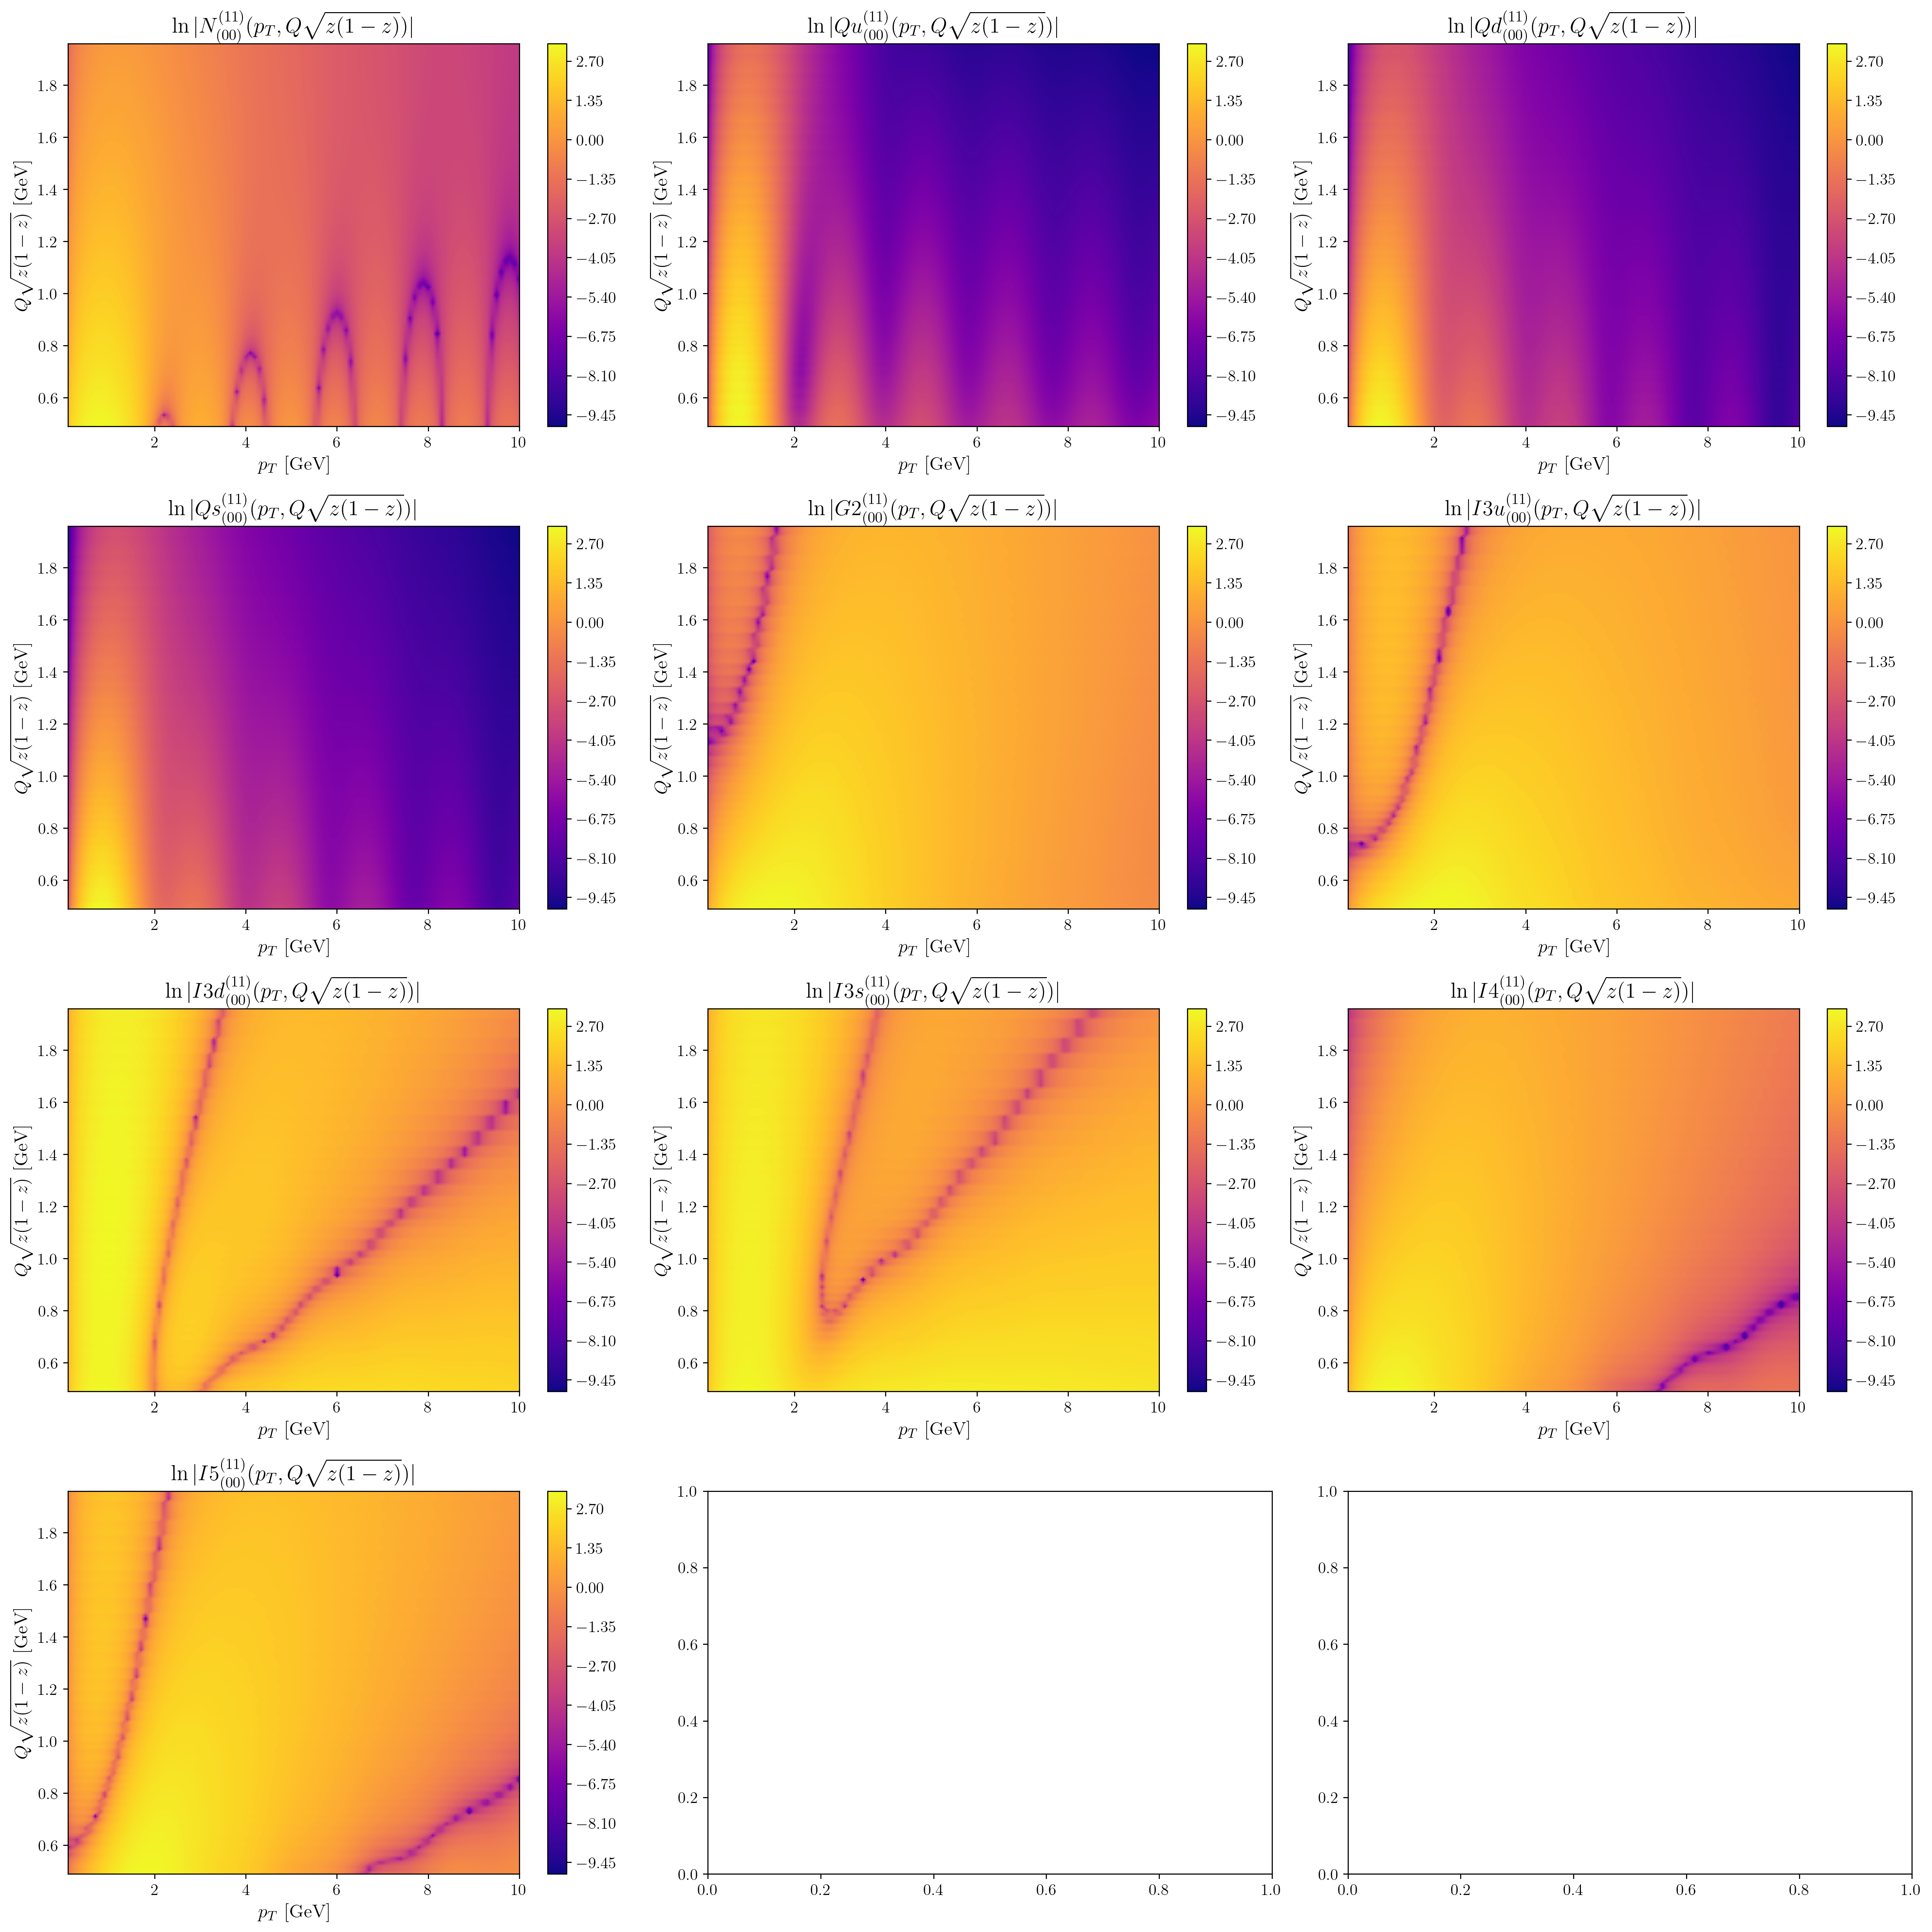

In [199]:
# make fb contour plot
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(4, 3, figsize=(asp_ratio*psize*3, psize*4))

ampij = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2], [3,0]]
for iamp, amp in enumerate(amps):
    if iamp == 0: 
        contour = ax[ampij[iamp][0], ampij[iamp][1]].contourf(pT_grid, Q_grid, fb_values[amp], levels=300, cmap='plasma')  # More levels = smoother
    else:
        ax[ampij[iamp][0], ampij[iamp][1]].contourf(pT_grid, Q_grid, fb_values[amp], levels=300, cmap='plasma')  # More levels = smoother
        
    cbar = fig.colorbar(contour, ax=ax[ampij[iamp][0], ampij[iamp][1]])
    ax[ampij[iamp][0], ampij[iamp][1]].set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
    ax[ampij[iamp][0], ampij[iamp][1]].set_ylabel(r'$Q \sqrt{z(1-z)} \,\,[\mathrm{GeV}]$')
    ax[ampij[iamp][0], ampij[iamp][1]].set_title(fr'$\ln|{amp}^{{(11)}}_{{(00)}} (p_T, Q \sqrt{{z(1-z)}})|$')

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

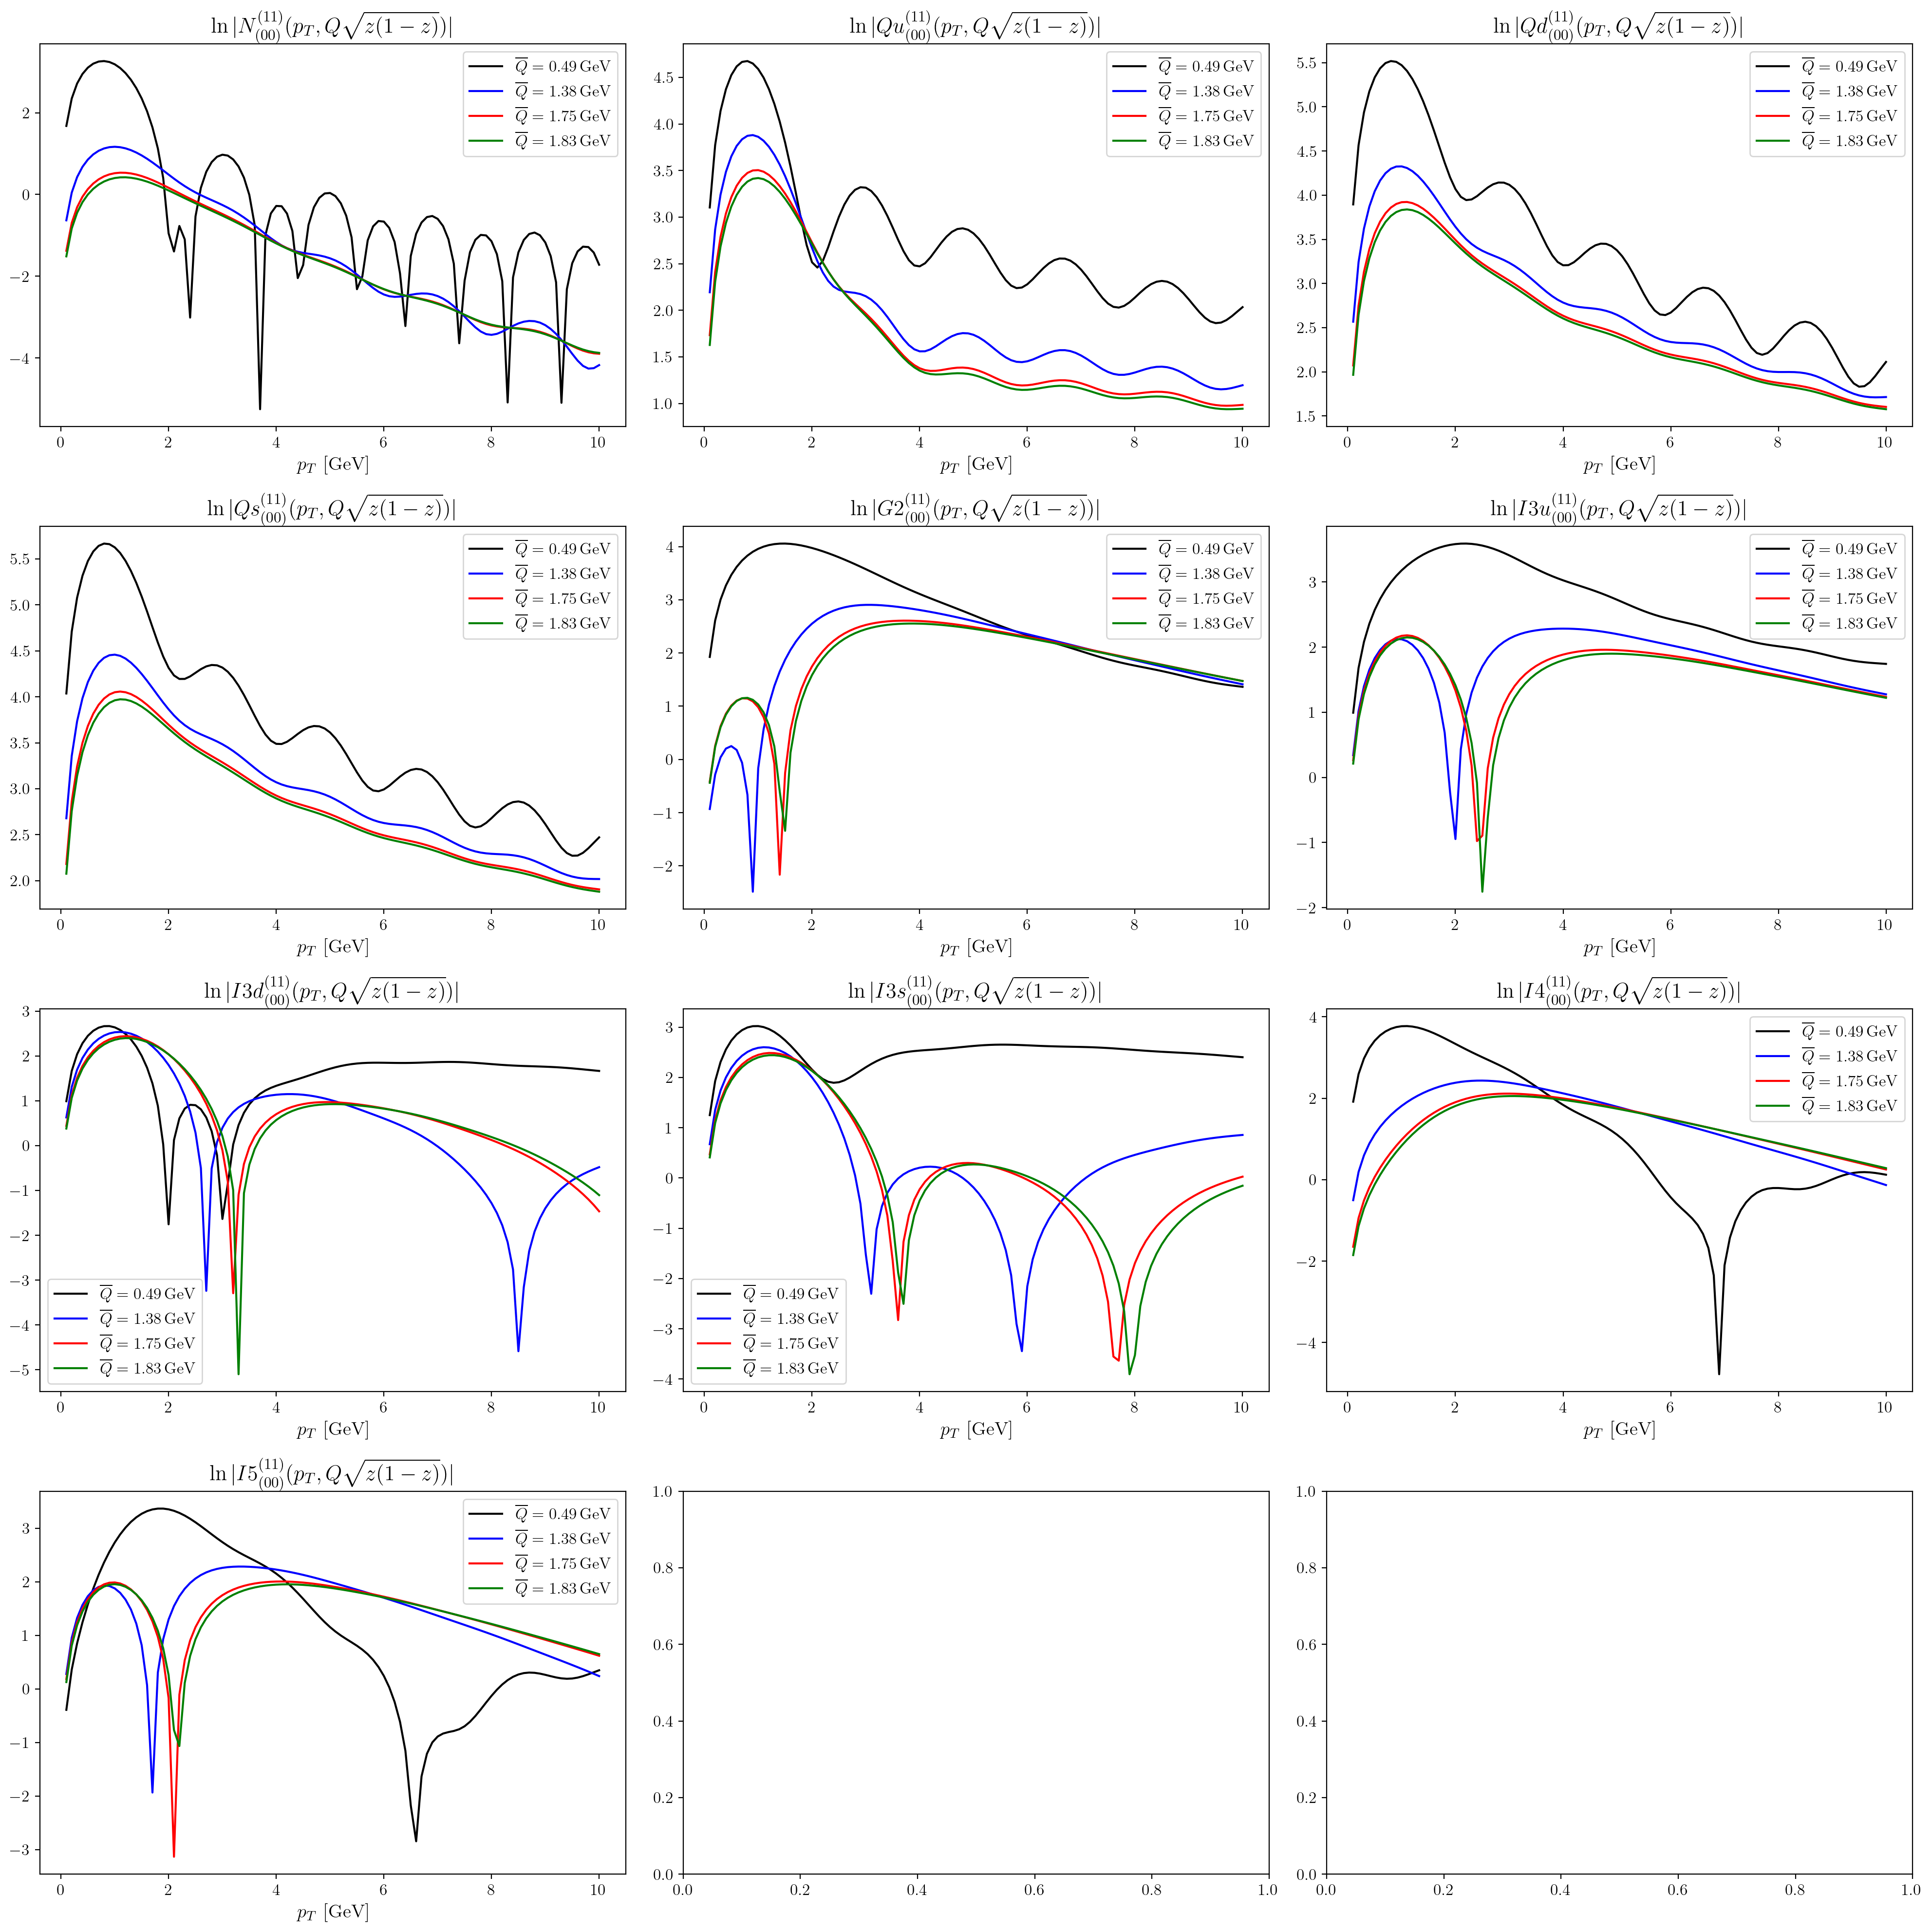

In [201]:
# make fb slice plots
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(4, 3, figsize=(asp_ratio*psize*3, psize*4))

ampij = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2], [3,0]]
for iamp, amp in enumerate(amps):

    colors = ['black', 'blue', 'red', 'green']
    for iQ, j in enumerate([0, 60, 85, 90]):
        ax[ampij[iamp][0], ampij[iamp][1]].plot(pT_grid[:,0], fb_values[amp][:,j], color=colors[iQ], label=rf'$\overline Q =  {round(Q_grid[0,j], 2)} \, \mathrm{{GeV}}$') 

    ax[ampij[iamp][0], ampij[iamp][1]].set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
    # ax[ampij[iamp][0], ampij[iamp][1]].set_ylabel(r'$Q \sqrt{z(1-z)} \,\,[\mathrm{GeV}]$')
    ax[ampij[iamp][0], ampij[iamp][1]].set_title(fr'$\ln|{amp}^{{(11)}}_{{(00)}} (p_T, Q \sqrt{{z(1-z)}})|$')

    ax[ampij[iamp][0], ampij[iamp][1]].legend()
    

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()

In [93]:
# compare IR regulating functions

kins = {}
kins['lowQ'] = dijet.Kinematics(Q=2.0, pT=3.0, z=0.4, x=0.001)
kins['highQ'] = dijet.Kinematics(Q=7.0, pT=3.0, z=0.4, x=0.001)

xis = [0, 0.2, 0.5, 1]
djs = {}
for xi in xis:
    djs[xi] = dijet.DIJET(fit_type='pp', constrained_moments=True, gauss_param=xi, lambdaIR=0.2)

fbs = {}
for xi in xis:
    fbs[xi] = {}
    for var in ['lowQ', 'highQ']:
        fbs[xi][var] = {}

        for amp in ['Qu', 'N']:
            fbs[xi][var][amp] = djs[xi].fourier_bessel(kins[var], [[1,1,1,1]], amp)



--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded un

In [94]:

# make kinematics text
info_text = {var: '' for var in ['lowQ', 'highQ']}

for var in ['lowQ', 'highQ']:
    info_text[var] = fr'$Q^2 \, = \,{round(kins[var].Q**2, 2)}\, \mathrm{{GeV^2}}$' + '\n'
    info_text[var] += fr'$p_\perp \, = \,{round(kins[var].pT, 2)}\, \mathrm{{GeV}}$' + '\n'
    info_text[var] += fr'$x \, = \,{round(kins[var].x, 3)}$' + '\n'
    info_text[var] += fr'$z \, = \,{round(kins[var].z, 3)}$'


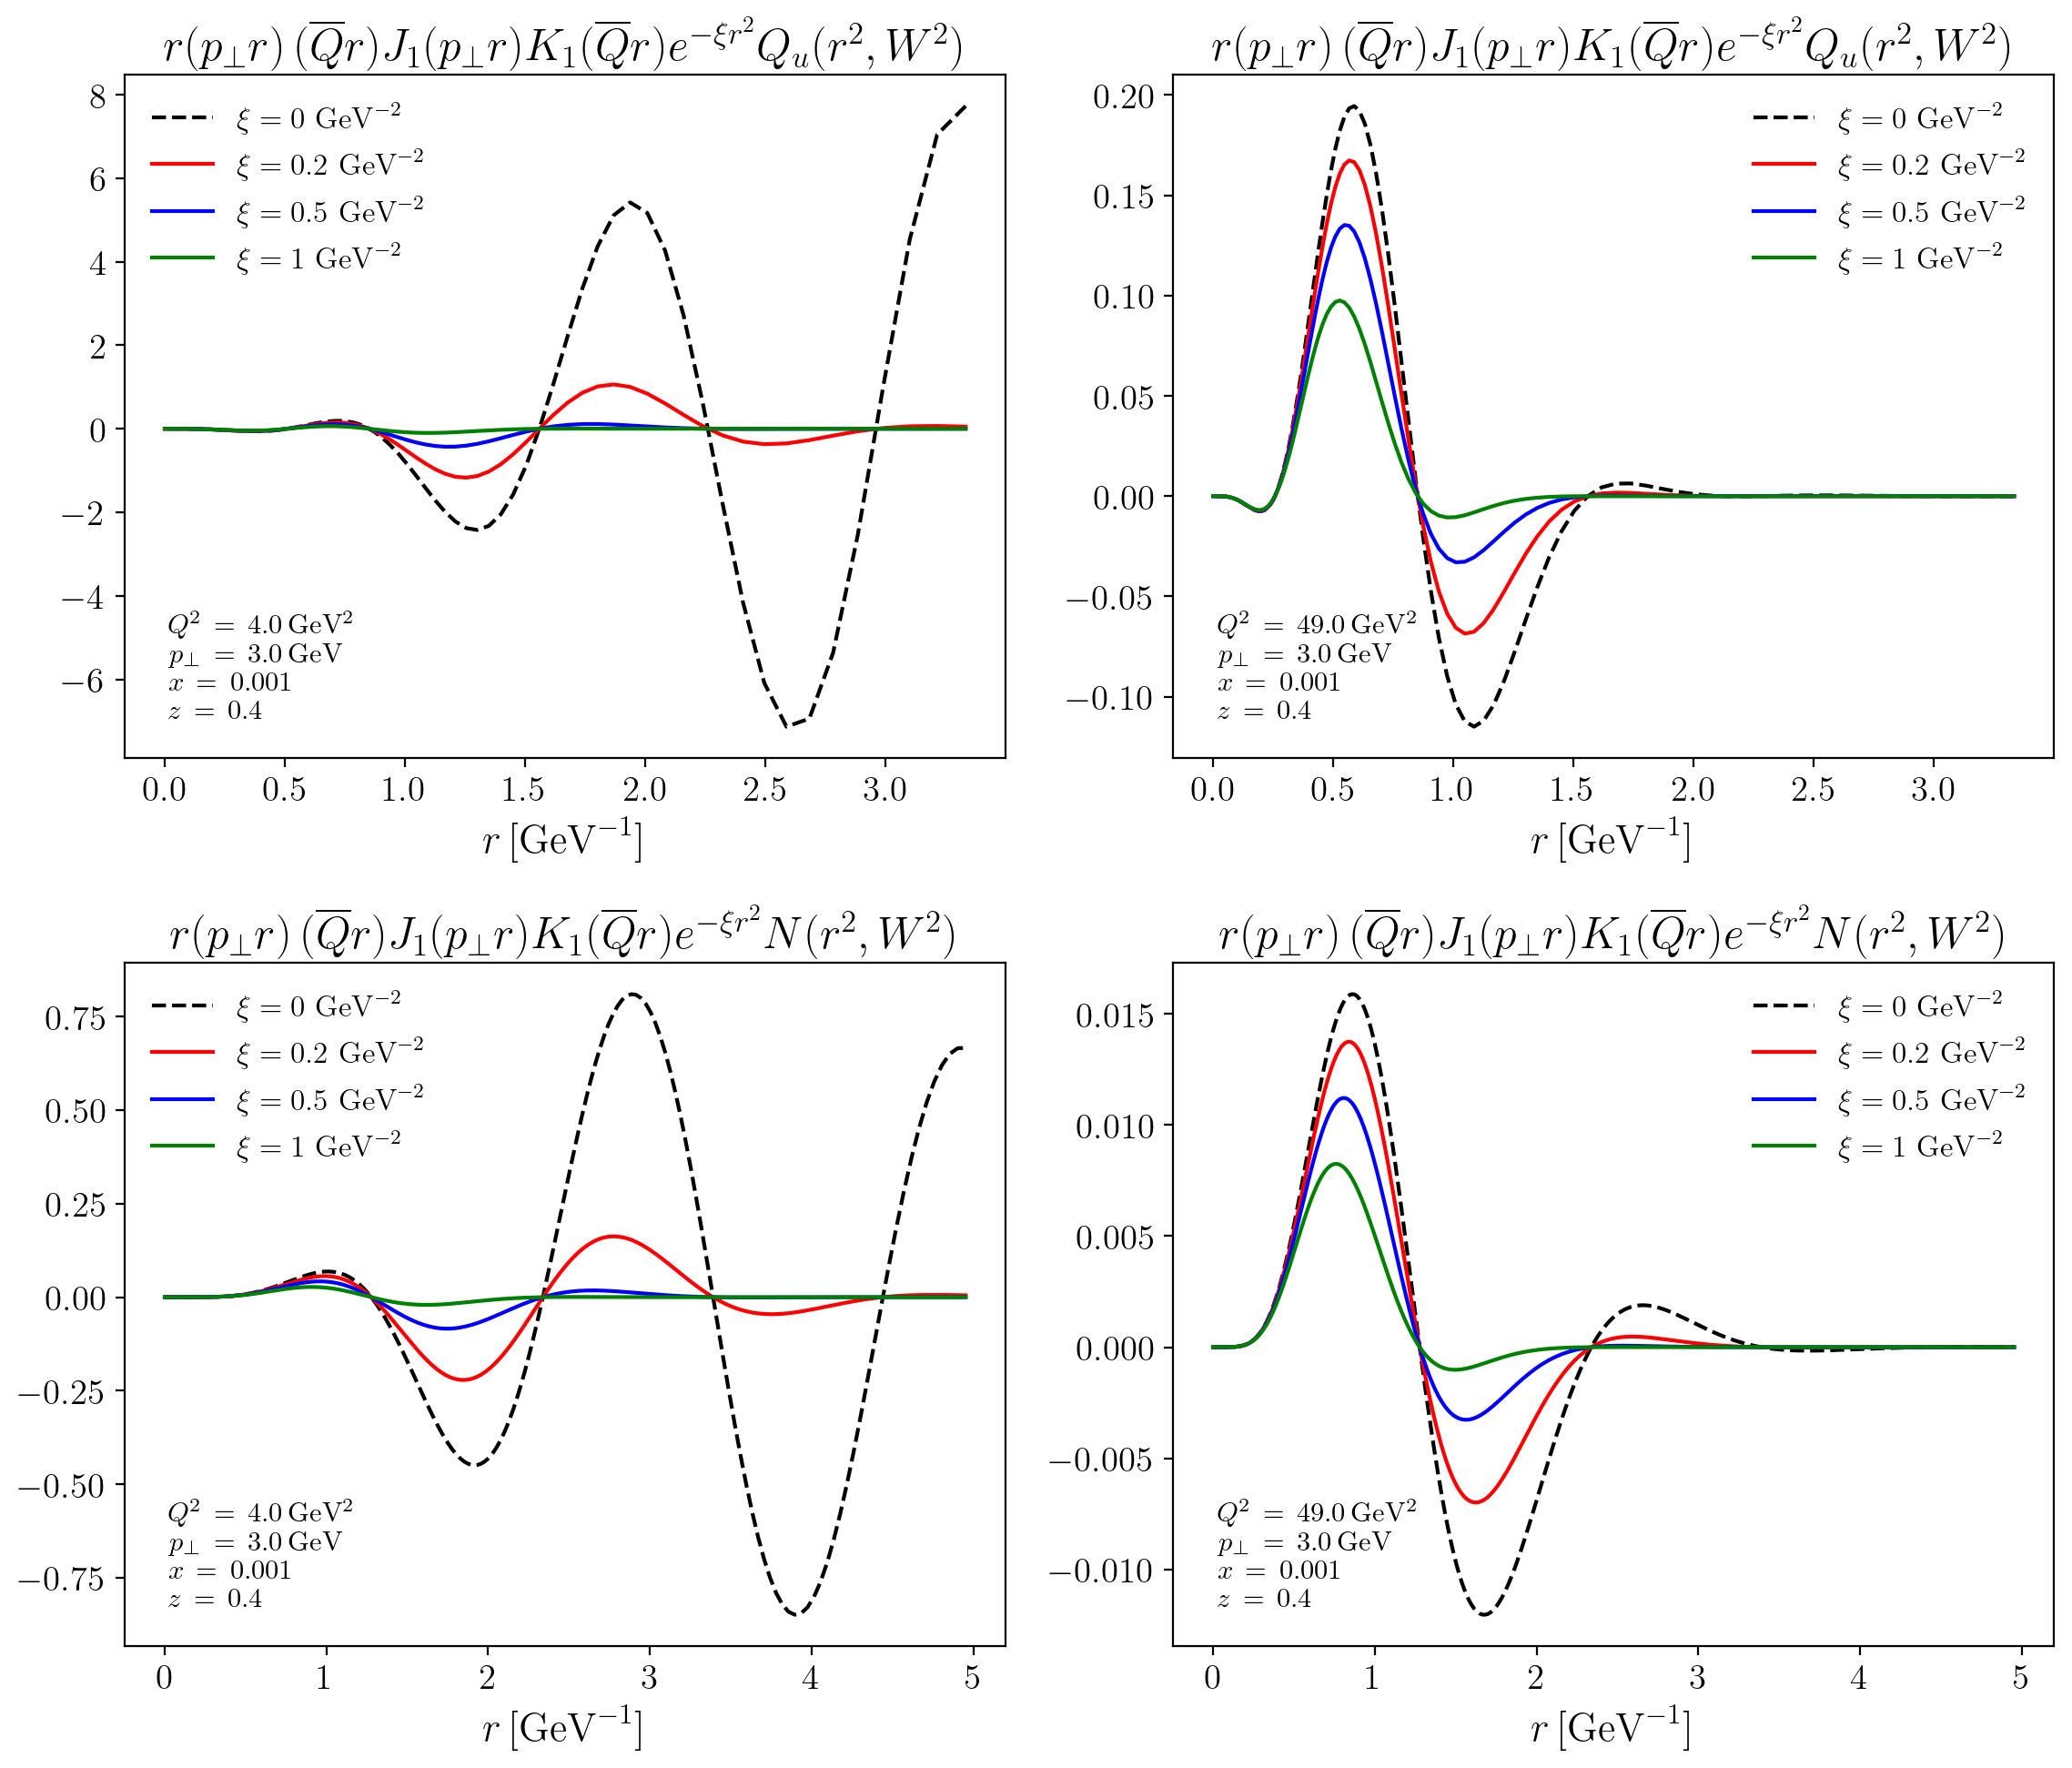

In [97]:
# IR regulator plots
asp_ratio = 3.5/3
psize = 5
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

colors = ['black', 'red', 'blue', 'green', 'orange', 'black']
linestyles = ['--', '-', '-', '-', '-']
bas = np.sqrt(3/(2*np.pi))
x_values = {'Qu': (1/0.3)*np.exp(-djs[0.0].s10_values*(1/(2*bas))), 'N': np.exp(djs[0.0].logr_values)}


for ixi, xi in enumerate(xis):
    for ivar, var in enumerate(['lowQ', 'highQ']):
        for iamp, amp in enumerate(['Qu', 'N']):
            ax[iamp, ivar].plot(x_values[amp], fbs[xi][var][amp], label = fr'$\xi = {xi}\,\, \mathrm{{GeV}}^{{-2}}$', color=colors[ixi], linestyle=linestyles[ixi])

for i, var in enumerate(['lowQ', 'highQ']):
    
    ax[0, i].set_xlabel(r'$r\, [\mathrm{GeV}^{-1}]$')
    ax[0, i].set_title(r'$r (p_\perp r) \, (\overline{Q} r) J_1 (p_\perp r) K_1(\overline{{Q}} r) e^{{-\xi r^2}} Q_u(r^2, W^2)$')
    ax[0, i].legend(frameon=False)
    # ax[0, i].semilogx()
    ax[0, i].text(
        0.05, 0.05, info_text[var], 
        transform=ax[0, i].transAxes,
        ha='left', va='bottom', 
        fontsize=11, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='none')
    )
    
    ax[1, i].set_xlabel(r'$r\, [\mathrm{GeV}^{-1}]$')
    ax[1, i].set_title(r'$r (p_\perp r) \, (\overline{Q} r) J_1 (p_\perp r) K_1(\overline{{Q}} r) e^{{-\xi r^2}} N(r^2, W^2)$')
    ax[1, i].legend(frameon=False)
    # ax[1, i].semilogx()
    ax[1, i].text(
        0.05, 0.05, info_text[var], 
        transform=ax[1, i].transAxes,
        ha='left', va='bottom', 
        fontsize=11, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='none')
    )

plt.tight_layout()
plt.show()


# fig.savefig(f"IR_regs{tag}.png")

